In [2]:
import pandas as pd
df=pd.read_csv("Week7_train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df.shape[0]

42000

In [5]:
from sklearn.model_selection import train_test_split
df_exp,df_rem=train_test_split(df,test_size=0.9,random_state=42)
df_exp.shape

(4200, 785)

In [6]:
df_exp.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9867,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27923,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41720,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35503,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21372,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import numpy as np
unique_classes=np.unique(df['label'])
num_classes=len(unique_classes)
print("unique classses",unique_classes)
print("unique classes in class label are",num_classes)

unique classses [0 1 2 3 4 5 6 7 8 9]
unique classes in class label are 10


In [44]:
print(df_exp['label'].value_counts().sort_index())
print(df_exp['label'].value_counts().sum())

label
0    411
1    461
2    396
3    413
4    413
5    368
6    444
7    464
8    396
9    434
Name: count, dtype: int64
4200


In [45]:
sum=0
for i in range(0,10):
    count=0
    for j in range(0,df_exp.shape[0]):
        if df.label[j]==i:
            count+=1  
    print(i,count)
    sum+=count
print(sum)

0 425
1 460
2 454
3 386
4 409
5 398
6 436
7 427
8 404
9 401
4200


In [13]:
X=df_exp.drop(columns='label')
y=df_exp["label"]

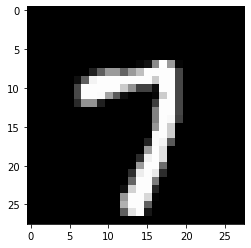

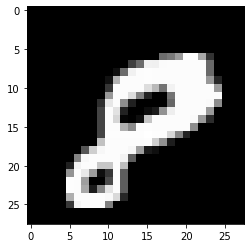

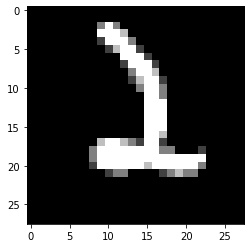

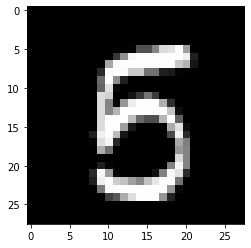

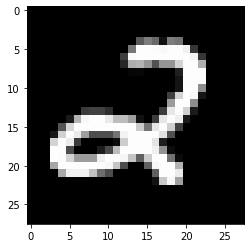

In [14]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28,28),cmap="gray")
    plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3150, 784) (3150,)
Testing set shape: (1050, 784) (1050,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [24]:

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
print("KNN model trained with default parameters!")


KNN model trained with default parameters!


In [25]:
y_pred=knn.predict(X_test)
y_pred

array([6, 4, 0, ..., 4, 4, 4])

In [62]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("confusionmatrix\n",cm)

confusionmatrix
 [[ 93   0   0   0   0   0   1   1   0   0]
 [  0 116   0   0   0   0   1   0   0   0]
 [  1   1  91   2   2   0   0   4   1   0]
 [  0   0   2 121   0   1   0   2   2   1]
 [  0   3   0   0  93   0   0   1   1   1]
 [  1   1   0   1   3  78   0   0   0   2]
 [  4   2   0   0   0   0 101   0   0   0]
 [  0   3   0   0   1   0   0 109   0   1]
 [  1   4   0   3   0   3   4   0  85   5]
 [  1   1   0   1   2   0   0   6   0  85]]


In [63]:
from sklearn.metrics import classification_report, accuracy_score
cr=classification_report(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
print("clasfn report;",cr)
print("accurancy",ac)

clasfn report;               precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.89      0.99      0.94       117
           2       0.98      0.89      0.93       102
           3       0.95      0.94      0.94       129
           4       0.92      0.94      0.93        99
           5       0.95      0.91      0.93        86
           6       0.94      0.94      0.94       107
           7       0.89      0.96      0.92       114
           8       0.96      0.81      0.88       105
           9       0.89      0.89      0.89        96

    accuracy                           0.93      1050
   macro avg       0.93      0.92      0.92      1050
weighted avg       0.93      0.93      0.93      1050

accurancy 0.9257142857142857


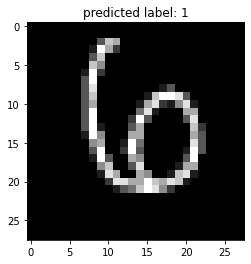

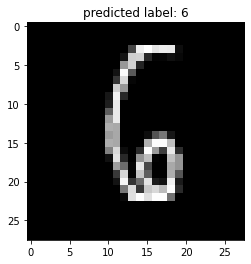

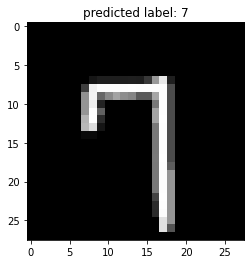

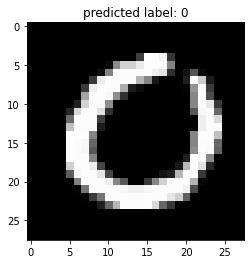

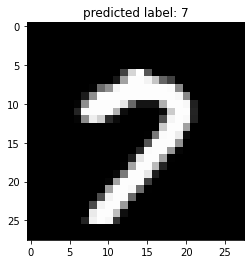

In [65]:
import matplotlib.pyplot as plt 
X_test_array=X_test.to_numpy()
for i in range(5):
    plt.imshow(X_test_array[i].reshape(28,28),cmap='gray')
    plt.title(f"predicted label: {y_pred[i]}")
    plt.show()

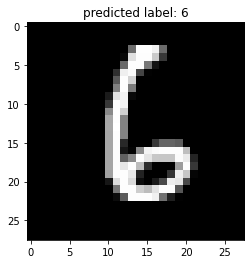

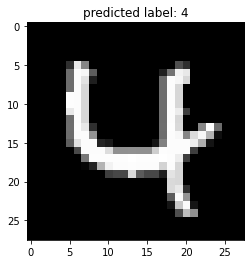

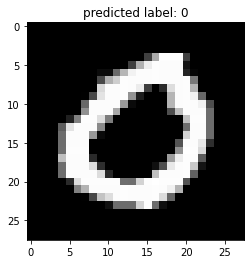

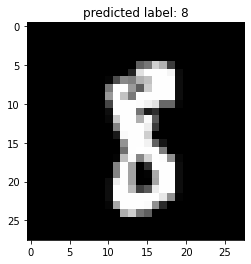

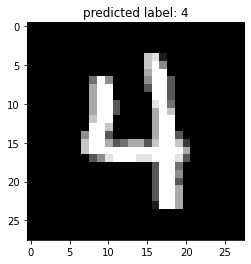

In [26]:
import matplotlib.pyplot as plt 

for i in range(5):
    plt.imshow(X_test.iloc[i].values.reshape(28,28),cmap='gray')
    plt.title(f"predicted label: {y_pred[i]}")
    plt.show()